In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Note: Duc did this first part; necessary for me to play :)

In [2]:
train = pd.read_csv("covid2train.csv", index_col = 0)

In [3]:
def clean(train):
    features = ['age', 'sex', 'country', 'chronic_disease_binary', 'que_paso']
    xtrain = train[features]

# Dropping NA's from only 'sex' + 'country'    
    subset = xtrain.dropna(subset = ['age','sex','country'])
    countries = xtrain['country'].drop_duplicates().dropna()

# Replacing the age ranges with their means    
    mp = {'20-29': np.mean([20,29]), '40-49': np.mean([40,49]),'50-59': np.mean([50,59]),
          '60-69': np.mean([60,69]), '70-79': np.mean([70,79]),
          '80-89': np.mean([80,89]),'90-99': np.mean([90,99]), '80-': 80}
    
# Dictionary replacing countries with numerical values
    mp2 = {}
    key = np.arange(len(countries) + 1)
    for i,j in zip(countries,key):
        val = {i:j}
        mp2.update(val)
        
    mp3 = {'male': 0, 'female': 1}
        
# Updating the training data with new values
    subset = subset.replace(mp).replace(mp2)
    subset = subset.replace(mp3)
    subset['chronic_disease_binary'] = subset['chronic_disease_binary']*1
    subset['age'] = subset['age'].astype(float)
    xtrain = subset.drop('que_paso', axis = 1)
    ytrain = subset['que_paso']
    return xtrain, ytrain

In [4]:
cleaned_subset, ytrain = clean(train)

#### Done by ya boi, Matt "the 'n' is silent" Nwerem, cheeeeeeeyuuuuh

In [5]:
cleaned_subset.age.value_counts()

30.0    18
84.5    17
38.0    17
42.0    15
39.0    15
        ..
14.0     1
10.0     1
92.0     1
15.0     1
9.0      1
Name: age, Length: 96, dtype: int64

In [6]:
ytrain.value_counts()

1.0    455
0.0    198
2.0     20
Name: que_paso, dtype: int64

In [7]:
cleaned_subset

,age,sex,country,chronic_disease_binary
1.0,78.0,0,1,0
2.0,61.0,1,2,0
113.0,28.0,0,2,0
224.0,56.0,1,2,0
335.0,79.0,1,2,0
...,...,...,...,...
217292.0,84.5,1,15,0
217293.0,44.5,1,15,0
226430.0,80.0,1,15,0
228855.0,94.5,1,15,0


In [8]:
cleaned_subset.sex.value_counts()

0    406
1    267
Name: sex, dtype: int64

In [9]:
ytrain     

1.0         0.0
2.0         1.0
113.0       1.0
224.0       1.0
335.0       1.0
           ... 
217292.0    0.0
217293.0    1.0
226430.0    0.0
228855.0    0.0
229810.0    1.0
Name: que_paso, Length: 673, dtype: float64

### Logistic Regression

##### Sex and Age explain the most amount of data

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
reg = sm.add_constant(cleaned_subset['age'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sat, 02 May 2020   Prob (F-statistic):           4.69e-54
Time:                        23:18:43   Log-Likelihood:                -373.49
No. Observations:                 673   AIC:                             751.0
Df Residuals:                     671   BIC:                             760.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3818      0.041     33.380      0.000       1.301       1.463
age           -0.0129      0.001    -16.979      0.000      -0.014      -0.011
==============================================================================
Omnibus:                       61.227   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.505
Skew:                           0.602   Prob(JB):                     7.46e-24
Kurtosis:                       4.532   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = sm.add_constant(cleaned_subset['chronic_disease_binary'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     251.8
Date:                Sat, 02 May 2020   Prob (F-statistic):           2.20e-48
Time:                        23:18:44   Log-Likelihood:                -386.54
No. Observations:                 673   AIC:                             777.1
Df Residuals:                     671   BIC:                             786.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8600      0.018     46.863      0.000       0.824       0.896
chronic_disease_binary    -0.6811      0.043    -15.868      0.000      -0.765      -0.597
==============================================================================
Omnibus:                       33.427   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.104
Skew:                          -0.361   Prob(JB):                     3.98e-13
Kurtosis:                       4.231   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg = sm.add_constant(cleaned_subset['sex'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.306
Date:                Sat, 02 May 2020   Prob (F-statistic):             0.0695
Time:                        23:18:44   Log-Likelihood:                -492.10
No. Observations:                 673   AIC:                             988.2
Df Residuals:                     671   BIC:                             997.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7069      0.025     28.291      0.000       0.658       0.756
sex            0.0721      0.040      1.818      0.069      -0.006       0.150
==============================================================================
Omnibus:                       20.321   Durbin-Watson:                   0.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.136
Skew:                          -0.341   Prob(JB):                     0.000115
Kurtosis:                       2.575   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
columns = cleaned_subset[['age','chronic_disease_binary']]
reg = sm.add_constant(columns)
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sat, 02 May 2020   Prob (F-statistic):           5.75e-77
Time:                        23:18:44   Log-Likelihood:                -317.42
No. Observations:                 673   AIC:                             640.8
Df Residuals:                     670   BIC:                             654.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.2952      0.039     33.282      0.000       1.219       1.372
age                       -0.0095      0.001    -12.360      0.000      -0.011      -0.008
chronic_disease_binary    -0.4677      0.042    -11.021      0.000      -0.551      -0.384
==============================================================================
Omnibus:                       72.153   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.401
Skew:                           0.585   Prob(JB):                     3.66e-38
Kurtosis:                       5.187   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF comparison shows that our features are not vary correlated to each other

In [15]:
def calculate_vif(r_squared):
    ## Your code goes here
    vif = 1/(1-r_squared)
    
    return vif

In [16]:
def generate_vif_dataframe(train_data):
    ## Your code goes here

    #for column in data:
        # take all nums in data and do single linreg w/ quality as y
        # get r-squared for that column
        # calcluate_vif(r-sqaured of column)
        # create data frame, column 1 = var name, column 2 = VIF

    varNames = np.array([])
    VIFs = np.array([])

    for column in train_data:
        
        columnObj = train_data.drop(column, axis = 1)
        reg = sm.add_constant(columnObj)
        results = sm.OLS(train_data[column], reg).fit()
        r_sq = results.rsquared
        VIF = calculate_vif(r_sq)

        varNames= np.append(varNames, column)    
        VIFs= np.append(VIFs, VIF)
        
    vif_dataframe = pd.DataFrame({"Variable Name": varNames, "VIF": VIFs})
    
    plt.bar(varNames,VIFs)
    plt.xticks(rotation=50)
    plt.title("VIFs of COVID-19 Data")
    return vif_dataframe

,Variable Name,VIF
0,age,1.211824
1,sex,1.015261
2,country,1.006339
3,chronic_disease_binary,1.217295


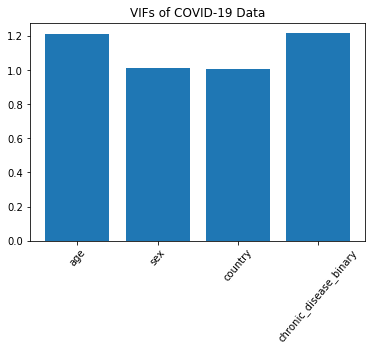

In [17]:
generate_vif_dataframe(cleaned_subset)